In [23]:
import pandas as pd
import numpy as np 
import tensorflow as tf
import seaborn as sns 
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [24]:
from sklearn.neural_network import MLPClassifier

import os
from os import listdir
from PIL import Image
import keras
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
import tensorflow_hub as hub
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [101]:
import os
import cv2

def load_and_resize_images_from_folder(folder, target_size=(224, 224)):
    images = []
    for filename in os.listdir(folder):
        # Convert the file extension to lowercase before checking
        if any([filename.lower().endswith(x) for x in ['.jpeg', '.jpg', '.png']]):
            img = cv2.imread(os.path.join(folder, filename))
            if img is not None:
                # Resize the image to the specified target size
                img = cv2.resize(img, target_size)
                class_label = os.path.basename(folder)  # Extract the class label from the folder name
                images.append((img, class_label, filename))  # Include class label and file name in the tuple
    return images

images_dir1 = load_and_resize_images_from_folder('Bacterial leaf blight')
images_dir2 = load_and_resize_images_from_folder('Brown spot')
images_dir3 = load_and_resize_images_from_folder('Leaf smut')


In [103]:
images_dir1[0]  #Checking if it works fine

(array([[[135, 147, 156],
         [254, 254, 254],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[135, 146, 155],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[133, 147, 150],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

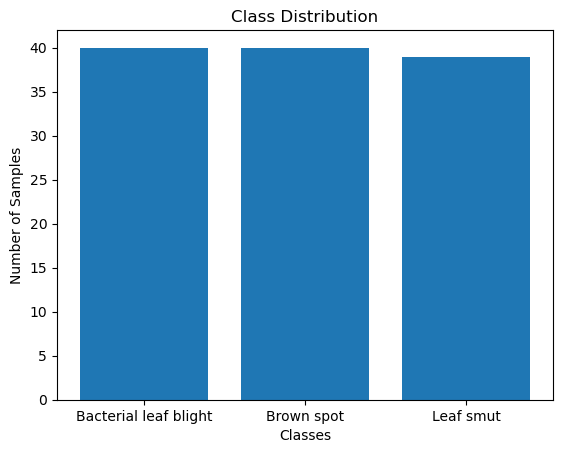

In [104]:
class_counts = {class_name: len(images) for class_name, images in {
    'Bacterial leaf blight': images_dir1,
    'Brown spot': images_dir2,
    'Leaf smut': images_dir3
}.items()}

plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.show()

In [105]:
no_of_samples = 15

dir1_set = images_dir1[:no_of_samples]
dir2_set = images_dir2[:no_of_samples]
dir3_set = images_dir3[:no_of_samples]

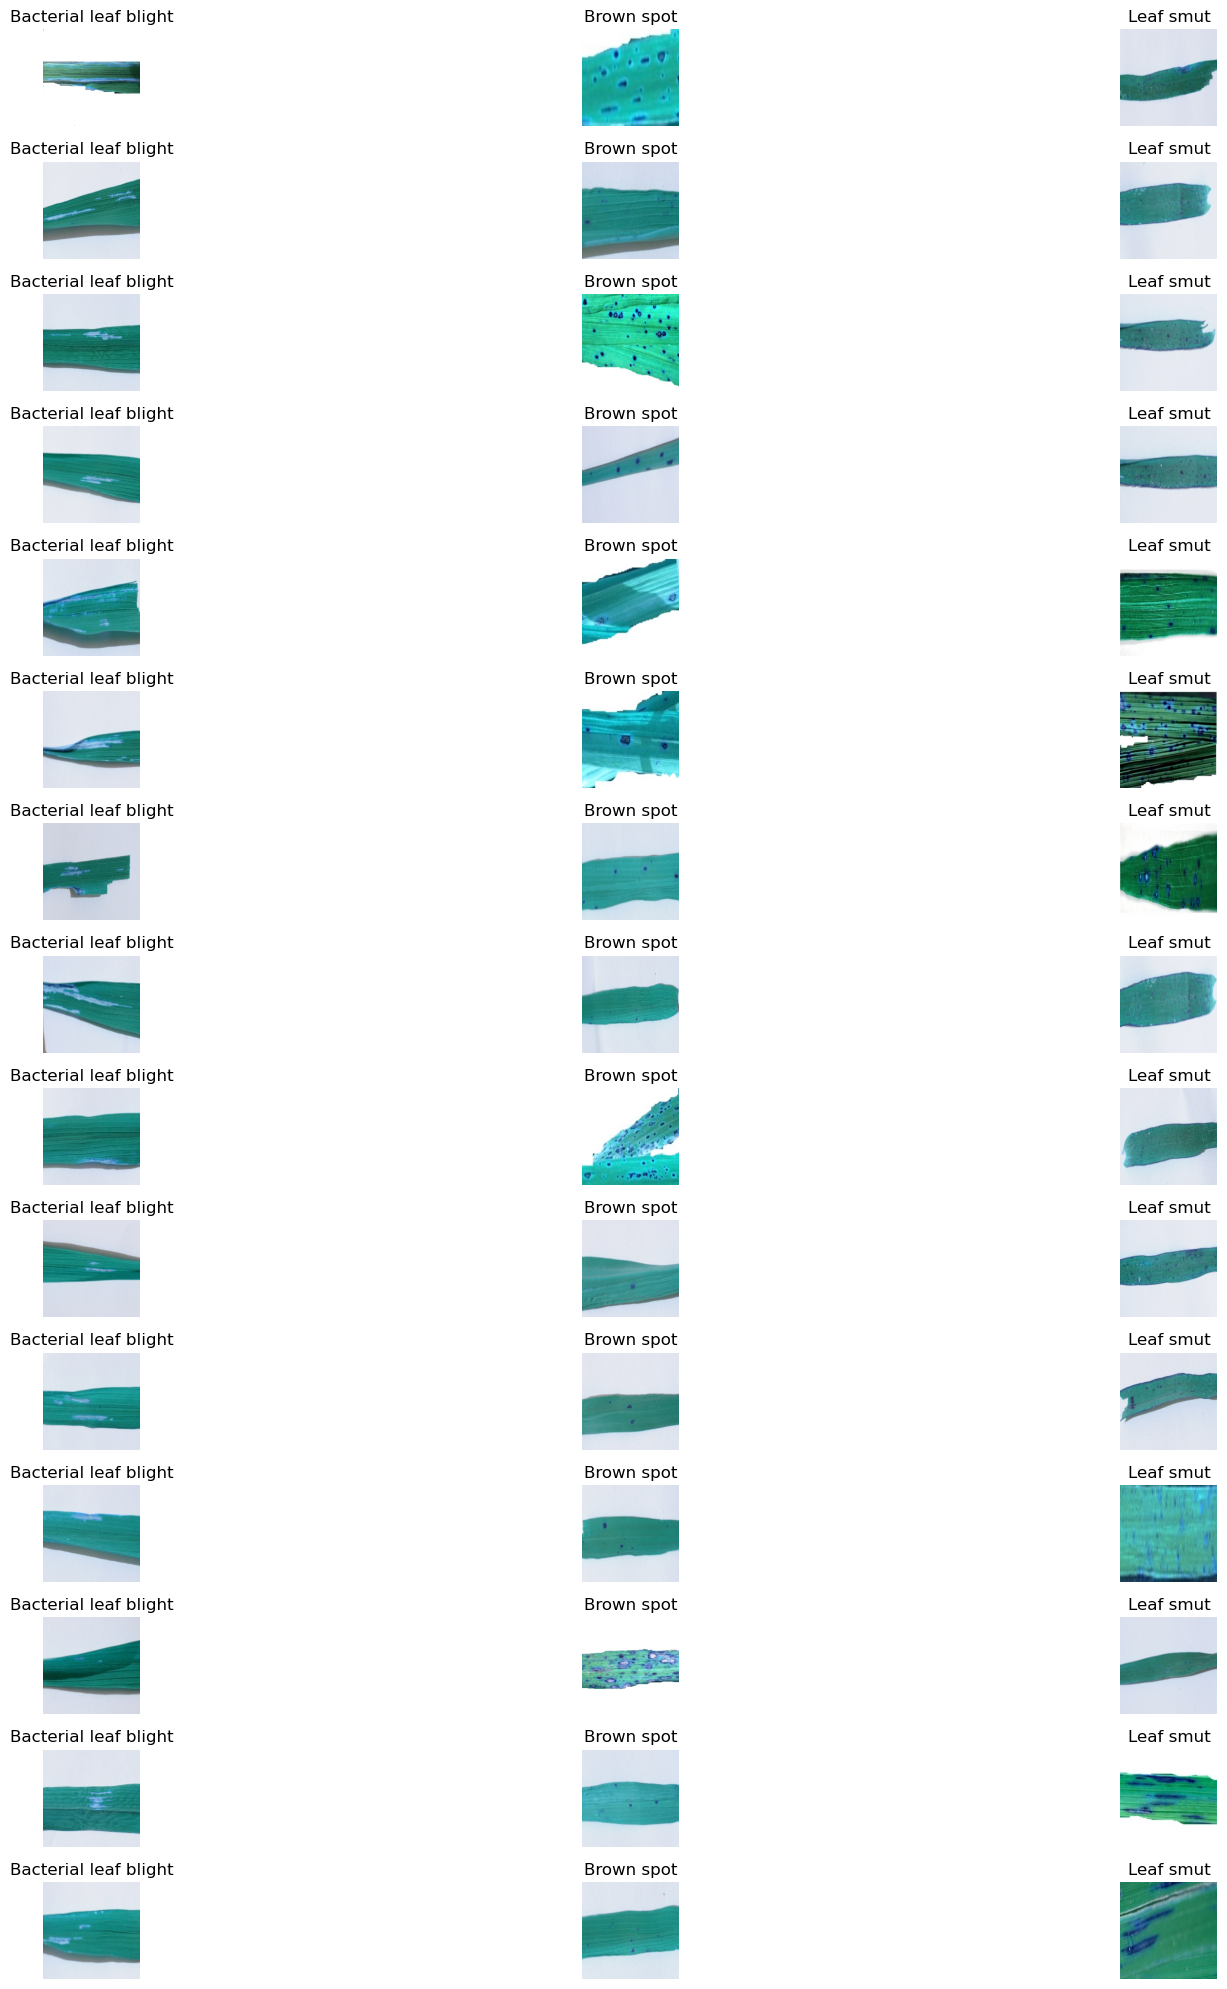

In [106]:
fig, axes = plt.subplots(nrows = no_of_samples, ncols = 3, figsize=(20,20))

for i in range(no_of_samples):
    axes[i,0].imshow(dir1_set[i][0])
    axes[i,0].set_title('Bacterial leaf blight')
    axes[i,0].axis('off')
    
    axes[i,1].imshow(dir2_set[i][0])
    axes[i,1].set_title('Brown spot')
    axes[i,1].axis('off')
    
    axes[i,2].imshow(dir3_set[i][0])
    axes[i,2].set_title('Leaf smut')
    axes[i,2].axis('off')
    
plt.tight_layout()
plt.show()

In [107]:
avg_colors = {}
for class_name, images in {
    'Bacterial leaf blight': images_dir1,
    'Brown spot': images_dir2,
    'Leaf smut': images_dir3
}.items():
    avg_color = np.mean([np.mean(img, axis=(0, 1)) for img, _ in images], axis=0)
    avg_colors[class_name] = avg_color

plt.figure(figsize=(10, 6))
for class_name, avg_color in avg_colors.items():
    plt.plot(avg_color, label=class_name)
plt.xlabel('Color Channel')
plt.ylabel('Average Value')
plt.title('Average Color Channels')
plt.legend()
plt.show()

ValueError: too many values to unpack (expected 2)

In [108]:
class_counts

{'Bacterial leaf blight': 40, 'Brown spot': 40, 'Leaf smut': 39}